<a href="https://colab.research.google.com/github/bhatimukul/Assignment-func/blob/main/Ensemble_Learning_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Theoretical**

---



Q1.Can we use Bagging for regression problems?

Ans.Yes, **Bagging (Bootstrap Aggregating)** can be used for **regression problems**. In fact, **Bagging Regressor** is a commonly used ensemble method for improving the stability and accuracy of regression models.

### How Bagging Works for Regression:
1. **Bootstrap Sampling**: It creates multiple subsets of the training data by randomly sampling with replacement.
2. **Train Base Models**: A regression model (e.g., Decision Tree, Linear Regression, etc.) is trained on each subset independently.
3. **Aggregation (Averaging Predictions)**: The final prediction is obtained by **averaging** the predictions of all base models.

### Benefits of Bagging for Regression:
✅ **Reduces Variance**: Especially useful for high-variance models like Decision Trees.  
✅ **Improves Accuracy**: Aggregation leads to better generalization.  
✅ **Handles Overfitting**: Works well when individual models overfit but their average provides a stable estimate.  

### Example: Using `BaggingRegressor` in Scikit-Learn
```python
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression

# Generate sample data
X, y = make_regression(n_samples=1000, n_features=5, noise=0.2, random_state=42)

# Split into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Base model: Decision Tree Regressor
base_model = DecisionTreeRegressor()

# Bagging Regressor
bagging_reg = BaggingRegressor(base_model, n_estimators=50, random_state=42)
bagging_reg.fit(X_train, y_train)

# Predictions
y_pred = bagging_reg.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")
```
### When to Use Bagging for Regression:
✔ If you have a **high-variance model** like Decision Trees.  
✔ When your dataset is **prone to overfitting** and you need better generalization.  
✔ If you want to **improve robustness** without losing too much interpretability.  


Q2. What is the difference between multiple model training and single model training?

Ans.The key difference between **single model training** and **multiple model training** lies in how the learning process is structured and how predictions are made.

---

## **1️⃣ Single Model Training**
🔹 **Definition**: Training a single machine learning model on the entire dataset.  
🔹 **Example**: Training a **single Decision Tree, Linear Regression, or Neural Network** on your dataset.  
🔹 **Workflow**:
   - Train one model using all available training data.
   - Tune hyperparameters for this one model.
   - Make predictions based on the single trained model.

🔹 **Pros**:
   ✅ Simpler and easier to implement.  
   ✅ Faster training and inference (for simple models).  
   ✅ Easier to interpret results (especially for models like Decision Trees or Logistic Regression).  

🔹 **Cons**:
   ❌ Can suffer from **high variance** (overfitting) or **high bias** (underfitting).  
   ❌ May not generalize well on unseen data.  
   ❌ Less robust to noise or outliers in data.  

---

## **2️⃣ Multiple Model Training (Ensemble Learning)**
🔹 **Definition**: Training multiple models and combining their outputs to improve performance.  
🔹 **Types of Multiple Model Training**:
   - **Bagging (Bootstrap Aggregating)** → Reduces variance by averaging multiple models (e.g., Random Forest).  
   - **Boosting** → Improves accuracy by focusing on errors iteratively (e.g., XGBoost, AdaBoost, Gradient Boosting).  
   - **Stacking** → Combines multiple models using a meta-model to make final predictions.  

🔹 **Workflow**:
   - Train multiple models on different parts of the data (Bagging) or sequentially improve weak models (Boosting).
   - Aggregate or combine predictions for better accuracy.

🔹 **Pros**:
   ✅ **Reduces overfitting** (Bagging helps control variance).  
   ✅ **Improves accuracy** by combining multiple weak learners.  
   ✅ **More robust** to noise and anomalies.  

🔹 **Cons**:
   ❌ **More computationally expensive** (requires training multiple models).  
   ❌ **Harder to interpret** compared to a single model.  
   ❌ **Complex implementation** and tuning of multiple models.  

---

### **Comparison Table**
| Feature | Single Model Training | Multiple Model Training (Ensemble) |
|---------|----------------------|--------------------------------|
| **Number of Models** | 1 | Multiple |
| **Complexity** | Simple | More complex |
| **Performance** | Depends on the model | Usually better (lower error) |
| **Overfitting** | High (in some cases) | Lower (especially with Bagging) |
| **Interpretability** | Easy (e.g., Decision Tree, Linear Regression) | Harder (e.g., Random Forest, XGBoost) |
| **Computation Cost** | Low | High |
| **Robustness** | Can be sensitive to noise | More robust |

---

### **When to Use?**
✔ **Single Model** → When you need a quick, interpretable solution and computational efficiency.  
✔ **Multiple Models (Ensemble Learning)** → When you need **higher accuracy, lower variance, and better generalization** (especially in complex problems like image classification, NLP, or finance).  


Q3. Explain the concept of feature randomness in Random Forest?

Ans.### **Feature Randomness in Random Forest 🌲🎲**  

**Feature randomness** in **Random Forest** refers to the process of selecting a **random subset of features** at each split while building decision trees. This randomness helps in making the ensemble model more diverse and reduces overfitting.

---

### **How Feature Randomness Works**  

1. **Dataset Bootstrapping (Row Sampling)**  
   - Random Forest first creates multiple **bootstrap samples** by randomly selecting rows (data points) with replacement.
   
2. **Feature Selection at Each Split (Column Sampling)**  
   - Unlike a normal Decision Tree (which considers all features at every split), **Random Forest selects a random subset of features at each split**.  
   - This means that every decision tree in the forest is trained on a different combination of features, introducing diversity.  
   - The number of randomly chosen features is controlled by the hyperparameter **`max_features`**.  

3. **Tree Growth and Aggregation**  
   - Each tree grows independently and makes predictions.  
   - The final prediction is made by **majority voting (classification)** or **averaging (regression)** across all trees.  

---

### **Why Feature Randomness is Useful?**
✅ **Reduces Overfitting** → Since each tree only considers a subset of features, they don’t learn the same patterns, making the model more generalizable.  
✅ **Increases Diversity** → Each tree sees different features, leading to a variety of decision rules, which improves ensemble performance.  
✅ **Handles Correlated Features Better** → If some features are highly correlated, Random Forest ensures no single feature dominates decision-making.  

---

### **Example: Feature Randomness in Python**
```python
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

# Load dataset
X, y = load_iris(return_X_y=True)

# Train Random Forest with feature randomness
rf = RandomForestClassifier(n_estimators=100, max_features="sqrt", random_state=42)
rf.fit(X, y)

# Display feature importance
print(rf.feature_importances_)
```
🔹 Here, **`max_features="sqrt"`** means that at each split, the model randomly selects **√(number of features)**.  
🔹 If `max_features=None`, the model would behave like Bagging (using all features at each split).  

---

### **Key Hyperparameters for Feature Randomness**
| Hyperparameter | Description |
|---------------|-------------|
| **`max_features="sqrt"`** | Default for classification; selects √(total features) at each split. |
| **`max_features="log2"`** | Selects log₂(total features) at each split. |
| **`max_features=None`** | Uses all features (like a regular decision tree). |
| **`max_features=k`** | Manually set the number of features to consider at each split. |


Q4.What is OOB (Out-of-Bag) Score?

Ans.### **OOB (Out-of-Bag) Score in Random Forest 🌲🎒**  

The **Out-of-Bag (OOB) Score** is an internal validation method used in **Random Forest** to estimate the model's performance **without using a separate validation set**.

---

### **How OOB Works?**
1. **Bootstrap Sampling**:
   - Random Forest trains each decision tree on a **random subset** (bootstrapped sample) of the training data.  
   - This means that **some data points (around 37%) are left out** of each individual tree's training.

2. **Making Predictions on OOB Samples**:
   - The trees that **did not see** a particular data point during training can be used to **predict** it.
   - The final OOB prediction is obtained by averaging (for regression) or majority voting (for classification) across all trees.

3. **Computing the OOB Score**:
   - Once all OOB predictions are collected, the accuracy (for classification) or R² score (for regression) is computed.

---

### **Why OOB Score is Useful?**
✅ **Acts as a Built-in Cross-Validation** → No need for a separate validation set, saving data.  
✅ **Less Computation Overhead** → Faster than techniques like K-Fold Cross-Validation.  
✅ **Gives a Reliable Estimate of Generalization Performance** → Helps detect overfitting.  

---

### **Example: Computing OOB Score in Python**
```python
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

# Load dataset
X, y = load_iris(return_X_y=True)

# Train Random Forest with OOB score enabled
rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)
rf.fit(X, y)

# Print OOB score
print(f"OOB Score: {rf.oob_score_:.4f}")
```
🔹 **`oob_score=True`** enables the OOB estimation during training.  
🔹 **`rf.oob_score_`** stores the OOB accuracy (for classification) or R² score (for regression).  

---

### **When Should You Use OOB Score?**
✔ When you have **limited data** and don’t want to set aside a validation set.  
✔ When using **Random Forest**, as it naturally supports OOB scoring.  
✔ When you want a **quick performance estimate** without doing cross-validation.  


Q5. How can you measure the importance of features in a Random Forest model?

Ans.### **Measuring Feature Importance in a Random Forest Model 🌲✨**  

Feature importance helps us understand which features contribute the most to a Random Forest model’s predictions. **Random Forest provides two main ways** to measure feature importance:

---

## **1️⃣ Mean Decrease in Impurity (MDI) – Gini Importance**
🔹 **Concept**: Measures how much a feature **reduces impurity (Gini or variance)** across all trees in the forest.  
🔹 **Calculation**:  
   - Every time a feature is used in a tree split, the reduction in impurity (e.g., Gini index or MSE) is recorded.  
   - These reductions are **averaged** across all trees to determine feature importance.  

🔹 **Pros**:
   ✅ Fast and easy to compute  
   ✅ Provides insight into feature contribution  

🔹 **Cons**:
   ❌ **Biased towards high-cardinality features** (features with many unique values tend to have higher importance)  
   ❌ **Not reliable when features are correlated**  

---

## **2️⃣ Permutation Importance – Mean Decrease in Accuracy (MDA)**
🔹 **Concept**: Measures how much the model’s **accuracy drops** when a feature’s values are randomly shuffled.  
🔹 **Calculation**:
   - The model’s original accuracy is recorded.  
   - The values of a single feature are randomly shuffled (breaking the relationship with the target).  
   - The model is re-evaluated, and the drop in accuracy is measured.  
   - A larger accuracy drop means the feature is more important.  

🔹 **Pros**:
   ✅ Works well with correlated features  
   ✅ More reliable than MDI for interpreting feature effects  

🔹 **Cons**:
   ❌ Computationally expensive (requires multiple re-evaluations)  
   ❌ Not useful if the dataset is too small  

---

## **Example: Compute Feature Importance in Python**
### **Method 1: Using `feature_importances_` (MDI)**
```python
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
import pandas as pd

# Load dataset
X, y = load_iris(return_X_y=True)
feature_names = load_iris().feature_names

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Extract feature importance
importance = rf.feature_importances_

# Display feature importance
df = pd.DataFrame({"Feature": feature_names, "Importance": importance})
df = df.sort_values(by="Importance", ascending=False)
print(df)
```
🔹 The **higher the importance value**, the more influential the feature is.  

---

### **Method 2: Using Permutation Importance (MDA)**
```python
from sklearn.inspection import permutation_importance

# Compute permutation importance
perm_importance = permutation_importance(rf, X, y, n_repeats=10, random_state=42)

# Display importance
df_perm = pd.DataFrame({"Feature": feature_names, "Importance": perm_importance.importances_mean})
df_perm = df_perm.sort_values(by="Importance", ascending=False)
print(df_perm)
```
🔹 **Permutation importance is better when features are correlated**, while `feature_importances_` is faster.

---

### **When to Use Each Method?**
| **Method** | **Best For** | **Weakness** |
|------------|-------------|--------------|
| **MDI (Gini Importance)** | Fast insights into feature contribution | Biased towards high-cardinality features |
| **Permutation Importance (MDA)** | Works well with correlated features | Computationally expensive |


Q6.Explain the working principle of a Bagging Classifier?

Ans.### **Bagging Classifier: Working Principle 🎒🌲**  

A **Bagging Classifier** is an **ensemble learning method** that improves classification accuracy and reduces overfitting by combining multiple weak models (base learners). It is based on **Bootstrap Aggregating (Bagging)**.

---

## **How the Bagging Classifier Works?**
1️⃣ **Bootstrap Sampling (Data Randomization)**  
   - The training dataset is **randomly sampled with replacement** to create multiple subsets of the original data.  
   - Each subset has the same size as the original dataset but contains **some duplicate samples** and **some missing samples** (~37% of original data is left out in each subset).  

2️⃣ **Train Multiple Base Models (Parallel Training)**  
   - Each subset is used to train an **independent** model (usually a weak learner like a Decision Tree).  
   - These base models **do not interact with each other** and are trained in parallel.  

3️⃣ **Aggregation (Voting for Classification)**  
   - Each model makes a prediction for a given input.  
   - The final output is determined by **majority voting** (for classification) or **averaging** (for regression).  

---

## **Key Benefits of Bagging Classifier**
✅ **Reduces Overfitting** → A single Decision Tree may overfit, but multiple trees reduce variance.  
✅ **Improves Stability** → Works well on noisy data, as it reduces the impact of outliers.  
✅ **Handles High Variance Models** → Ideal for weak learners like Decision Trees.  
✅ **Parallel Processing** → Can be trained in parallel, making it computationally efficient.  

---

## **Bagging Classifier in Python (Using Scikit-Learn)**
```python
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

# Load dataset
X, y = load_iris(return_X_y=True)

# Split data into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base model (weak learner)
base_model = DecisionTreeClassifier()

# Create Bagging Classifier
bagging_clf = BaggingClassifier(base_model, n_estimators=50, random_state=42)

# Train the model
bagging_clf.fit(X_train, y_train)

# Predictions
y_pred = bagging_clf.predict(X_test)

# Evaluate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Bagging Classifier Accuracy: {accuracy:.4f}")
```
🔹 **`n_estimators=50`** → Trains 50 Decision Trees.  
🔹 **Majority voting is used** to make final predictions.  

---

## **Comparison: Bagging vs. Boosting**
| Feature | **Bagging** | **Boosting** |
|---------|------------|-------------|
| **Model Independence** | Independent models | Sequential models (each model learns from errors of the previous one) |
| **Goal** | Reduce variance (better stability) | Reduce bias (better accuracy) |
| **Training Process** | Parallel training | Sequential training |
| **Overfitting** | Less likely | More prone to overfitting if not regularized |
| **Example Models** | Bagging Classifier, Random Forest | AdaBoost, Gradient Boosting, XGBoost |


Q7.How do you evaluate a Bagging Classifier’s performance?

Ans.### **Evaluating a Bagging Classifier’s Performance 🎒✅**  

To measure the effectiveness of a **Bagging Classifier**, we use standard classification metrics along with ensemble-specific techniques like **Out-of-Bag (OOB) Score**.

---

## **1️⃣ Standard Performance Metrics**  
Depending on whether it's a **binary** or **multi-class classification** problem, you can use the following metrics:

### **✔ Accuracy (for balanced datasets)**
Measures the proportion of correct predictions.  
\[
Accuracy = \frac{\text{Correct Predictions}}{\text{Total Predictions}}
\]

```python
from sklearn.metrics import accuracy_score

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
```

---

### **✔ Precision, Recall, and F1-Score (for imbalanced datasets)**
For cases where class distribution is skewed:
- **Precision**: Measures how many predicted positives are actually positive.  
- **Recall (Sensitivity)**: Measures how many actual positives were correctly predicted.  
- **F1-Score**: The harmonic mean of Precision and Recall.  

```python
from sklearn.metrics import classification_report

# Generate detailed classification report
print(classification_report(y_test, y_pred))
```

---

### **✔ Confusion Matrix**
A **confusion matrix** provides insights into how well the model differentiates between classes.

```python
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
```

---

## **2️⃣ Out-of-Bag (OOB) Score (Built-in Cross-Validation)**
Since Bagging uses **bootstrap sampling**, some data points are left out of each tree’s training set (~37% of data per tree).  
These **OOB samples** can be used to estimate the model's performance **without needing a validation set**.

```python
# Enable OOB score in Bagging Classifier
bagging_clf = BaggingClassifier(base_model, n_estimators=50, oob_score=True, random_state=42)

# Train model
bagging_clf.fit(X_train, y_train)

# Print OOB score
print(f"OOB Score: {bagging_clf.oob_score_:.4f}")
```
🔹 **OOB Score ≈ Cross-Validation Accuracy**, so it helps validate performance without splitting the data.

---

## **3️⃣ ROC Curve & AUC Score (for Probabilistic Models)**
For models that provide probability outputs, ROC-AUC measures how well the classifier separates classes.

```python
from sklearn.metrics import roc_curve, auc

# Get probability predictions
y_probs = bagging_clf.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'r--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
```
🔹 **Higher AUC (closer to 1.0) → Better classifier performance.**  

---

### **Summary Table: Evaluation Methods**
| **Metric** | **Use Case** | **Code Example** |
|------------|-------------|-----------------|
| **Accuracy** | Balanced datasets | `accuracy_score(y_test, y_pred)` |
| **Precision, Recall, F1-Score** | Imbalanced datasets | `classification_report(y_test, y_pred)` |
| **Confusion Matrix** | Identify misclassifications | `confusion_matrix(y_test, y_pred)` |
| **OOB Score** | Internal cross-validation (no extra validation set needed) | `bagging_clf.oob_score_` |
| **ROC-AUC Score** | Probabilistic models (binary classification) | `roc_curve(y_test, y_probs)` |

Q8. How does a Bagging Regressor work?

Ans.### **Bagging Regressor: Working Principle 🎒📈**  

A **Bagging Regressor** is an ensemble learning method that improves the accuracy and stability of regression models by combining multiple weak regressors. It follows the same **Bootstrap Aggregating (Bagging)** concept used in classification but for regression problems.

---

## **How a Bagging Regressor Works?**
1️⃣ **Bootstrap Sampling (Data Randomization)**  
   - The training dataset is **randomly sampled with replacement** to create multiple subsets.  
   - Each subset has the same size as the original dataset but contains **some repeated** and **some missing** samples (~37% of the original data is left out per subset).  

2️⃣ **Train Multiple Base Regressors**  
   - Each bootstrapped subset is used to train an **independent weak regressor** (e.g., Decision Tree Regressor, Linear Regression, etc.).  
   - These regressors **do not interact** with each other and are trained **in parallel**.  

3️⃣ **Aggregation (Averaging for Regression)**  
   - The final prediction is computed by **averaging** the predictions of all individual regressors:  
     \[
     \hat{y} = \frac{1}{n} \sum_{i=1}^{n} \hat{y}_i
     \]
   - This reduces variance and improves generalization.  

---

## **Key Benefits of Bagging Regressor**
✅ **Reduces Overfitting** → Stabilizes high-variance models (e.g., Decision Trees).  
✅ **Handles Outliers** → Averaging reduces the impact of extreme values.  
✅ **Works Well for Non-Linear Data** → Can be used with complex models like Decision Tree Regressors.  
✅ **Parallel Training** → Each base model is trained independently, making it efficient.  

---

## **Bagging Regressor in Python (Using Scikit-Learn)**
```python
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import fetch_california_housing

# Load dataset
X, y = fetch_california_housing(return_X_y=True)

# Split data into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base model (weak learner)
base_model = DecisionTreeRegressor()

# Create Bagging Regressor
bagging_reg = BaggingRegressor(base_model, n_estimators=50, random_state=42)

# Train the model
bagging_reg.fit(X_train, y_train)

# Predictions
y_pred = bagging_reg.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
print(f"Bagging Regressor MSE: {mse:.4f}")
```
🔹 **`n_estimators=50`** → Trains 50 Decision Tree Regressors.  
🔹 **Final prediction is the average of all trees’ predictions.**  

---

## **Comparison: Bagging Regressor vs. Boosting Regressor**
| Feature | **Bagging Regressor** | **Boosting Regressor** |
|---------|------------------|------------------|
| **Model Independence** | Independent models | Sequential models (each model learns from previous errors) |
| **Goal** | Reduce variance | Reduce bias |
| **Training Process** | Parallel training | Sequential training |
| **Overfitting** | Less likely | More prone if not regularized |
| **Example Models** | Bagging Regressor, Random Forest Regressor | AdaBoost Regressor, Gradient Boosting, XGBoost |



Q9. What is the main advantage of ensemble techniques?

Ans.### **Main Advantage of Ensemble Techniques 🚀**  

The primary advantage of **ensemble techniques** is that they **combine multiple weak models** to create a **stronger, more robust model** that improves accuracy, reduces overfitting, and enhances generalization.  

---

## **Key Advantages of Ensemble Techniques:**
1️⃣ **Higher Accuracy & Performance**  
   - Combining multiple models reduces errors and improves predictive performance.  
   - Example: **Random Forest** outperforms a single Decision Tree by reducing variance.  

2️⃣ **Reduces Overfitting (Variance Reduction)**  
   - Individual models (e.g., Decision Trees) may overfit the training data.  
   - Bagging (like in Random Forest) helps by averaging predictions, making them more stable.  

3️⃣ **Handles Noisy Data & Outliers**  
   - Boosting techniques (like AdaBoost, Gradient Boosting) **focus on misclassified samples**, making models more robust.  
   - Bagging reduces the impact of extreme values by **aggregating predictions**.  

4️⃣ **Works Well with Different Models (Heterogeneous Ensembles)**  
   - Stacking can combine different types of models (e.g., SVM + Decision Tree + Neural Network) to leverage their strengths.  

5️⃣ **Reduces Bias & Variance (Bias-Variance Tradeoff)**  
   - **Bagging** reduces **variance** (good for high-variance models like Decision Trees).  
   - **Boosting** reduces **bias** (good for underfitting models like Linear Regression).  

6️⃣ **Better Generalization to Unseen Data**  
   - Ensemble methods generalize well to new data compared to single models.  
   - Example: A Random Forest will perform better than a single Decision Tree on test data.  

---

## **Example: Ensemble vs. Single Model Performance**
```python
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

# Load dataset
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Single Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_acc = accuracy_score(y_test, dt_pred)

# Random Forest (Ensemble)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)

print(f"Decision Tree Accuracy: {dt_acc:.4f}")
print(f"Random Forest Accuracy: {rf_acc:.4f}")  # Higher accuracy due to ensemble effect
```
🔹 The **Random Forest (ensemble)** will have higher accuracy than a **single Decision Tree** because it reduces variance and improves stability.  

---

### **When Should You Use Ensemble Techniques?**
✅ When a single model has **high variance or overfits** (e.g., Decision Trees).  
✅ When you want to **improve accuracy** without increasing complexity.  
✅ When you need a **robust model** that generalizes well to new data.  


Q10.What is the main challenge of ensemble methods?

Ans.### **Main Challenges of Ensemble Methods ⚠️**  

While **ensemble methods** improve accuracy and stability, they come with certain challenges. Here are the key difficulties:  

---

## **1️⃣ Increased Computational Cost & Training Time ⏳💻**  
🔹 **Why?**  
- Ensembles train multiple models instead of one, requiring more **CPU/GPU power**.  
- **Boosting methods (e.g., Gradient Boosting, XGBoost)** train sequentially, increasing training time.  
- **Stacking ensembles** require additional layers of models, making them slower.  

🔹 **Solution:**  
✅ Use **parallel processing** for Bagging-based methods (e.g., Random Forest).  
✅ Optimize parameters (e.g., **reduce `n_estimators`** in Bagging/Boosting).  
✅ Use efficient implementations like **XGBoost, LightGBM**, or **distributed computing**.  

---

## **2️⃣ Model Interpretability & Complexity 🤯**  
🔹 **Why?**  
- Ensembles like **Random Forest, XGBoost, and Stacking** are **black-box models**, meaning they are hard to interpret.  
- Unlike a single **Decision Tree** (which shows clear rules), ensembles make decisions based on multiple models, making it difficult to explain how a prediction was made.  

🔹 **Solution:**  
✅ Use **feature importance** techniques (e.g., `feature_importances_` in Random Forest).  
✅ Use **SHAP (SHapley Additive Explanations)** or **LIME** for model interpretability.  

---

## **3️⃣ Risk of Overfitting (Especially in Boosting) 🎯**  
🔹 **Why?**  
- **Boosting methods (e.g., AdaBoost, Gradient Boosting)** focus heavily on misclassified points, which can lead to **overfitting** on noisy datasets.  
- Complex ensembles with too many trees/models can **memorize training data** instead of generalizing.  

🔹 **Solution:**  
✅ **Regularization** (Use `learning_rate` in boosting, `max_depth` in Random Forest).  
✅ **Early Stopping** (Stop training when validation performance stops improving).  
✅ **Pruning Trees** (Reduce tree depth to prevent memorization).  

---

## **4️⃣ Data Dependency & Poor Performance on Small Datasets 📉**  
🔹 **Why?**  
- Ensemble methods work best with **large datasets**; on small datasets, they may not significantly improve over single models.  
- If there’s too little data, Bagging **may not capture diverse patterns**, and Boosting **may overfit**.  

🔹 **Solution:**  
✅ Use simpler models like **Logistic Regression, Decision Trees, or k-NN** on small datasets.  
✅ Use **cross-validation** and OOB scoring to validate performance.  

---

## **5️⃣ Hyperparameter Tuning is Difficult ⚙️**  
🔹 **Why?**  
- Ensembles have **many hyperparameters** (e.g., `n_estimators`, `max_depth`, `learning_rate` in boosting).  
- Finding the best settings requires expensive techniques like **Grid Search or Bayesian Optimization**.  

🔹 **Solution:**  
✅ Use **Randomized Search** or **Bayesian Optimization** (`Optuna` for XGBoost).  
✅ Start with default values and adjust key parameters first (e.g., `n_estimators`, `max_depth`).  

---

### **🔎 Summary: Challenges & Solutions**
| **Challenge** | **Why it Happens?** | **Solution** |
|--------------|--------------------|-------------|
| **Computational Cost** | Multiple models require more processing power. | Use parallel processing, distributed computing, optimized libraries (e.g., XGBoost, LightGBM). |
| **Interpretability** | Ensembles are black-box models. | Use feature importance, SHAP, or LIME for explanations. |
| **Overfitting (Boosting)** | Models focus too much on misclassified points. | Use regularization, early stopping, and pruning. |
| **Data Dependency** | Works best with large datasets. | Use simpler models for small datasets or validate with cross-validation. |
| **Hyperparameter Tuning** | Many parameters to optimize. | Use Randomized Search, Bayesian Optimization (Optuna). |

---


Q11.Explain the key idea behind ensemble techniques?

Ans.### **Key Idea Behind Ensemble Techniques 🧩**

The core idea behind **ensemble techniques** is that **combining multiple models** (often called **weak learners**) can **boost performance** and produce a **stronger, more reliable model**. The underlying principle is based on the idea that individual models have their own strengths and weaknesses, and by aggregating their predictions, we can **reduce errors** and **improve generalization**.

---

## **Why Use Ensemble Methods?**

1️⃣ **Leverage Multiple Weak Learners**  
   - A **weak learner** is a model that performs slightly better than random guessing (e.g., a single decision tree).  
   - **Ensemble methods** combine multiple weak models to create a **stronger learner** that performs well on unseen data.  
   - For example, a **Decision Tree** alone might overfit the training data, but combining many trees (as in **Random Forest**) helps reduce overfitting.

---

2️⃣ **Bias-Variance Tradeoff**  
   - **Bias** refers to error due to overly simplistic models that don’t capture the underlying patterns.  
   - **Variance** refers to error due to models that are too complex and sensitive to small fluctuations in the data (e.g., overfitting).  
   - **Ensemble techniques** aim to **balance bias and variance**, combining models to reduce **high variance** (overfitting) or **high bias** (underfitting) depending on the approach.

---

### **Key Types of Ensemble Methods**

1️⃣ **Bagging (Bootstrap Aggregating)**  
   - **Idea**: Build multiple independent models (usually of the same type) using different subsets of the training data. The final prediction is made by **averaging** (regression) or **majority voting** (classification) from all models.  
   - **Main Advantage**: Reduces variance and overfitting.  
   - **Example**: **Random Forest** (using decision trees as base learners).

2️⃣ **Boosting**  
   - **Idea**: Build models sequentially, with each new model focusing on the errors (misclassifications or residuals) of the previous model. The final prediction is a weighted average of all models.  
   - **Main Advantage**: Reduces bias and increases model accuracy.  
   - **Example**: **AdaBoost**, **Gradient Boosting**, **XGBoost**.

3️⃣ **Stacking (Stacked Generalization)**  
   - **Idea**: Combine predictions from multiple models (can be of different types) and use a **meta-model** to learn how best to combine them. The meta-model takes the predictions of base models as features and learns the optimal combination.  
   - **Main Advantage**: Leverages the strengths of different types of models.  
   - **Example**: Combining Decision Trees, SVM, and Logistic Regression using a Logistic Regression meta-model.

4️⃣ **Voting Classifier/Regressor**  
   - **Idea**: A simple ensemble method where predictions from multiple models are combined by **majority voting** (for classification) or **averaging** (for regression).  
   - **Main Advantage**: Works well when combining models of different types.  
   - **Example**: Combine **Logistic Regression**, **SVM**, and **Random Forest** for classification.

---

### **Ensemble Strategy Insights**
- **Bagging** is useful when you have **high-variance models** (like decision trees) and want to reduce overfitting.  
- **Boosting** works best when you need to **increase accuracy** and reduce bias by focusing on harder-to-classify examples.  
- **Stacking** is used when you want to leverage the strengths of different models and combine them intelligently.  
- **Voting** is simpler and often used when you have **diverse models** (e.g., Decision Trees and KNN) and want to aggregate their predictions.

---

## **Summary: The Key Idea of Ensemble Methods**
The key idea behind ensemble methods is to **combine multiple individual models** to create a stronger overall model that:
- **Reduces model bias** and **variance** (depending on the method).
- **Improves predictive accuracy** by leveraging the collective knowledge of multiple models.
- **Boosts robustness** by compensating for the weaknesses of individual models.

---


Q12.What is a Random Forest Classifier?

Ans.### **What is a Random Forest Classifier? 🌲🌲**

A **Random Forest Classifier** is an ensemble learning method used for classification tasks. It builds a large number of **decision trees** during training and outputs the **mode (majority vote)** of the individual trees' predictions for classification. This technique combines the predictions of many weak learners (individual decision trees) to create a **stronger, more accurate model**.

---

## **How Does a Random Forest Classifier Work?**

1️⃣ **Bootstrap Sampling (Bagging)**  
   - A **bootstrap sample** is a random subset of the training data created by sampling **with replacement**.  
   - **Multiple** decision trees are trained on different bootstrap samples of the data, meaning each tree is trained on a **slightly different subset of data**.  
   - Each tree learns independently, and there’s diversity between them.

2️⃣ **Feature Randomness (Random Feature Selection)**  
   - At each split in the decision tree, the algorithm doesn't consider all features but only a **random subset** of features.  
   - This helps to reduce correlation between trees, ensuring that each tree learns from different aspects of the data and preventing overfitting.

3️⃣ **Decision Tree Construction**  
   - Each tree is grown **deep** (until no further splits improve performance), and the **split criterion** is usually **Gini Impurity** or **Entropy** for classification tasks.  
   - Unlike a single decision tree, a random forest uses many trees (typically hundreds or thousands) to make the final prediction.

4️⃣ **Voting Mechanism (Majority Voting)**  
   - Once the forest is trained, each individual tree makes a **prediction**.  
   - For classification, the **Random Forest Classifier** predicts the class that has the most votes from all individual trees (majority voting).

---

## **Key Advantages of Random Forest Classifier**  
✅ **Reduced Overfitting**: Random Forest reduces the risk of overfitting compared to a single decision tree because of bagging and randomness.  
✅ **Higher Accuracy**: By aggregating many decision trees, it achieves a more accurate prediction.  
✅ **Handles Missing Data**: It can handle missing data by using **surrogate splits** and can still perform well even with incomplete datasets.  
✅ **Feature Importance**: It can be used to calculate feature importance, helping to understand which features are most useful for prediction.  
✅ **Robustness**: Random Forest is robust to noisy data and outliers because the averaging reduces the impact of such points.

---

## **Random Forest Classifier Example in Python**

Here's how you can use a Random Forest Classifier with **scikit-learn**:

```python
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

# Load dataset
X, y = load_iris(return_X_y=True)

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy:.4f}")
```

---

### **Important Parameters of Random Forest Classifier**
- **`n_estimators`**: Number of trees in the forest (higher is usually better, but computationally expensive).  
- **`max_depth`**: Maximum depth of the individual trees (prevents overfitting).  
- **`min_samples_split`**: Minimum number of samples required to split an internal node.  
- **`max_features`**: Number of features to consider when looking for the best split (a smaller number creates more diversity in trees).  
- **`random_state`**: Controls the randomness of the algorithm, making it reproducible.

---

## **Random Forest vs. Single Decision Tree**

| **Aspect**         | **Random Forest**                       | **Single Decision Tree**            |
|--------------------|-----------------------------------------|-------------------------------------|
| **Overfitting**    | Less prone to overfitting due to averaging | High risk of overfitting if not pruned |
| **Performance**    | Higher accuracy due to aggregation of many trees | Prone to high variance and lower accuracy |
| **Interpretability**| Harder to interpret (black-box)         | Easy to interpret (rule-based)     |
| **Training Time**  | Slower due to many trees                | Faster as it’s just one tree       |
| **Robustness**     | More robust to noise and outliers       | Sensitive to noise and outliers    |

---

### **When to Use Random Forest Classifier?**

✅ When you want a **high-accuracy model** without heavy tuning.  
✅ When your data has **multiple features** and you need a **model that reduces overfitting**.  
✅ When you need to **understand feature importance** in your dataset.  
✅ When you have **non-linear relationships** in the data that are difficult for simpler models to capture.

---


Q13.What are the main types of ensemble techniques?

Ans.### **Main Types of Ensemble Techniques 🧩**

Ensemble techniques are broadly classified into three main types based on how they combine the predictions of multiple models. Each type has its strengths and works best under different circumstances.

---

### **1️⃣ Bagging (Bootstrap Aggregating)**  
- **Idea**: Bagging combines multiple **independent models** trained on different subsets of the training data and then **aggregates** their predictions (via **majority voting** for classification or **averaging** for regression).  
- **Goal**: **Reduce variance** by training multiple models on different random samples of the data.
  
#### **How it Works:**
- Create **multiple bootstrap samples** (random samples with replacement) from the training dataset.
- Train a model (typically a **weak learner** like a **decision tree**) on each bootstrap sample.
- Make predictions by **aggregating** the predictions from all models (majority voting for classification or averaging for regression).

#### **Example Models:**
- **Random Forest** (multiple decision trees)
- **Bagging Classifier** (using classifiers like decision trees or k-NN)
- **Bagging Regressor** (using regression models like decision trees)

#### **Advantages:**
- Reduces **overfitting** (especially for high-variance models like decision trees).
- Can **parallelize** easily since models are trained independently.

---

### **2️⃣ Boosting**  
- **Idea**: Boosting combines **weak learners** sequentially, where each new model tries to **correct the errors** made by the previous one. The final prediction is a **weighted combination** of all individual models.
- **Goal**: **Reduce bias** by focusing on difficult-to-classify examples and iteratively improving the model.

#### **How it Works:**
- Train an initial model.
- In each subsequent round, assign more **weight** to the data points that were misclassified by the previous model.
- Combine the predictions from all models by giving higher weight to better-performing models.

#### **Example Models:**
- **AdaBoost** (Adaptive Boosting)
- **Gradient Boosting** (including **XGBoost**, **LightGBM**, **CatBoost**)
- **LogitBoost**

#### **Advantages:**
- **Highly accurate**, often leading to the best performance.
- Focuses on **misclassified points**, making it strong in capturing complex patterns in the data.
- **Versatile**—can be used for both classification and regression tasks.

#### **Challenges:**
- **Sensitive to noisy data** and outliers.
- **Slow training time**, especially when using complex models.

---

### **3️⃣ Stacking (Stacked Generalization)**  
- **Idea**: Stacking combines predictions from multiple models (often of different types) and then uses a **meta-model** (usually a simpler model) to learn how best to combine these predictions.  
- **Goal**: Leverage the strengths of various types of models and **combine them optimally** to improve performance.

#### **How it Works:**
- Train multiple different models on the same dataset (e.g., decision trees, SVMs, logistic regression).
- Use these models to make predictions on the training set.
- Feed the predictions from these base models into a **meta-model** (like logistic regression or another classifier) to combine their outputs.

#### **Example Models:**
- **Logistic Regression** on top of multiple base models (e.g., decision trees, k-NN, SVMs)
- **Neural Networks** used as meta-models
- **Linear Model** used for combining the predictions of base models

#### **Advantages:**
- **Flexibility**—works with diverse base models.
- **Higher accuracy** compared to individual models since it combines the **best predictions** of each base model.
- **Can use a variety of base learners**, including non-tree-based models.

#### **Challenges:**
- Can be **computationally expensive** as it requires training multiple models.
- The meta-model might **overfit** if not carefully tuned.

---

### **4️⃣ Voting**  
- **Idea**: Voting is the simplest ensemble method where predictions from multiple models are combined by either **majority voting** (for classification) or **averaging** (for regression).
- **Goal**: Leverage multiple models to improve prediction accuracy without complex transformations.

#### **How it Works:**
- Train different models on the same dataset (e.g., decision trees, logistic regression, SVM).
- For classification, use **majority voting** to determine the final class (the class that receives the most votes from individual models).
- For regression, use the **average** of predictions from each model.

#### **Example Models:**
- **Voting Classifier** (combines different classifiers like Decision Tree, SVM, and Logistic Regression)
- **Voting Regressor** (combines regression models)

#### **Advantages:**
- **Simple to implement**.
- Can combine models of **different types** (heterogeneous models) for better diversity.
- **Fast** compared to other ensemble techniques.

#### **Challenges:**
- Performance may not be as high as **boosting** or **stacking** methods.
- Does not focus on correcting mistakes, so may be less accurate than boosting.

---

### **Comparison of Ensemble Techniques**

| **Ensemble Method**   | **Type of Models**             | **Combines Predictions**        | **Focus**               | **Advantages**                        | **Challenges**                     |
|-----------------------|--------------------------------|---------------------------------|-------------------------|---------------------------------------|------------------------------------|
| **Bagging**           | Same type of models (e.g., trees) | Aggregating (voting/averaging)  | Reduces variance        | Reduces overfitting, simple to parallelize | Less effective for high-bias problems |
| **Boosting**          | Same type of models (e.g., trees) | Weighted combination of models  | Reduces bias            | Very accurate, focuses on difficult cases | Prone to overfitting, slow training |
| **Stacking**          | Different types of models       | Meta-model learns optimal combination | Leverages multiple models' strengths | Highly accurate, versatile          | Complex, computationally expensive |
| **Voting**            | Different types of models       | Majority voting/averaging       | Combines diverse models | Simple, fast, and easy to implement   | May not perform as well as boosting |

---

### **When to Use Each Technique?**

- **Bagging** (e.g., Random Forest) is great when you have a **high-variance model** and want to reduce overfitting.
- **Boosting** (e.g., AdaBoost, XGBoost) works well when you need **high accuracy** and the model is **underfitting**.
- **Stacking** is ideal when you want to combine the **strengths of different models** and can afford the computational cost.
- **Voting** is useful when you need a **simple ensemble** and have multiple diverse models available.

---


Q14.What is ensemble learning in machine learning?

Ans.### **Ensemble Learning in Machine Learning** 🌐

**Ensemble learning** is a technique in machine learning where multiple **models** (often called **weak learners**) are combined to **solve a problem**. The main idea is that **combining multiple models** (even if they are weak individually) can produce a **stronger, more accurate model**. This technique improves the **predictive performance**, reduces the risk of **overfitting**, and often results in **better generalization** compared to individual models.

---

## **Why Use Ensemble Learning?**

1️⃣ **Better Performance**  
   - Combining multiple models allows you to **correct the mistakes** of individual models. This results in higher **accuracy** and **reliability**.

2️⃣ **Reduces Overfitting**  
   - Individual models may overfit the training data. By aggregating multiple models, ensemble learning reduces the overall risk of overfitting and improves **generalization** to unseen data.

3️⃣ **Increases Robustness**  
   - Ensembles are more robust to noise and outliers because they consider predictions from several models instead of just one, minimizing the impact of any incorrect predictions from a single model.

4️⃣ **Mitigates Bias and Variance**  
   - Ensemble learning allows for a balance between **bias** (error due to overly simplistic models) and **variance** (error due to overly complex models). Depending on the ensemble technique used, you can target a reduction in either bias or variance.

---

## **Types of Ensemble Learning Methods**

There are three main types of ensemble learning methods:

### **1️⃣ Bagging (Bootstrap Aggregating)**
   - **Idea**: Multiple models are trained independently on **different random subsets** of the training data, and their predictions are combined (usually by **voting** for classification or **averaging** for regression).
   - **Goal**: **Reduce variance** by combining the predictions of many models.
   - **Example**: **Random Forest**, where multiple decision trees are trained on different bootstrapped datasets.

### **2️⃣ Boosting**
   - **Idea**: Models are trained **sequentially**, and each new model focuses on the **errors** made by the previous models. The final prediction is a **weighted combination** of all individual models.
   - **Goal**: **Reduce bias** by iteratively correcting the mistakes made by earlier models.
   - **Example**: **AdaBoost**, **Gradient Boosting**, and **XGBoost**, where models like decision trees are trained to focus on hard-to-classify examples.

### **3️⃣ Stacking (Stacked Generalization)**
   - **Idea**: Multiple different models are trained on the same data, and then their predictions are combined by a **meta-model**. The meta-model learns how to optimally combine the predictions of the base models.
   - **Goal**: Leverage the strengths of different models by combining them in an intelligent way.
   - **Example**: Using **decision trees**, **SVMs**, and **logistic regression** as base models, and using a **logistic regression model** as the meta-model to combine their predictions.

### **4️⃣ Voting**
   - **Idea**: Multiple models are trained, and their predictions are combined by **majority voting** (classification) or **averaging** (regression). This is the simplest form of ensemble learning.
   - **Goal**: Combine the predictions of several models for improved accuracy.
   - **Example**: A **Voting Classifier** that combines predictions from decision trees, logistic regression, and SVM.

---

## **How Does Ensemble Learning Work?**

### **Steps in an Ensemble Learning Approach:**
1. **Train multiple models**:
   - Depending on the method (bagging, boosting, stacking, or voting), train several models on the dataset.
2. **Combine their predictions**:
   - After training, combine the predictions from each model. In bagging, it's usually **averaging** or **voting**, while in boosting and stacking, it's a **weighted combination** or **meta-model aggregation**.
3. **Final Prediction**:
   - The final output is made based on the combined predictions of all models.

---

## **Advantages of Ensemble Learning** 🌟

1. **Improved Accuracy**  
   - The most significant advantage is improved performance compared to individual models. By combining models, you reduce the likelihood of **errors** and improve generalization.

2. **Robustness to Overfitting**  
   - Especially with techniques like bagging, ensemble methods reduce the **variance** of a model, which leads to better performance on unseen data.

3. **Better Generalization**  
   - Because different models capture different aspects of the data, the ensemble tends to generalize better than any single model, especially when the individual models make errors in different areas.

4. **Error Reduction**  
   - Errors that may occur from an individual model are less likely to affect the overall ensemble model significantly, as it considers predictions from multiple models.

---

## **Challenges of Ensemble Learning** ⚠️

1. **Computational Complexity**  
   - Training and maintaining multiple models can be **computationally expensive**, especially for large datasets. This requires more memory and processing power.

2. **Interpretability**  
   - Ensemble methods, especially **boosting** and **stacking**, can be hard to interpret due to the complexity of combining many models, making them **black-box** approaches.

3. **Risk of Overfitting (in Boosting)**  
   - While boosting generally reduces bias, it can sometimes **overfit** the data, especially if the model is too complex or if there is too much noise in the data.

---

## **Popular Ensemble Learning Algorithms**

1. **Random Forest** (Bagging)  
   - Combines decision trees trained on different subsets of the data, reducing overfitting and improving prediction accuracy.

2. **AdaBoost** (Boosting)  
   - Focuses on misclassified instances by adjusting their weights, making it robust against errors.

3. **Gradient Boosting** (Boosting)  
   - Builds trees sequentially, each trying to correct the mistakes of the previous one. It is widely used for tasks where high accuracy is required.

4. **XGBoost** (Boosting)  
   - A highly optimized version of gradient boosting that is faster and more efficient. XGBoost is one of the most popular ensemble algorithms for Kaggle competitions.

5. **LightGBM** (Boosting)  
   - A variant of gradient boosting designed for faster training and efficiency, particularly on large datasets.

6. **Stacking**  
   - Combines multiple models (often heterogeneous) by learning the best way to combine them through a meta-model.

---

### **Summary: Ensemble Learning in a Nutshell**

- **Ensemble learning** improves the performance of machine learning models by combining multiple weak learners to create a stronger learner.
- **Bagging**, **Boosting**, **Stacking**, and **Voting** are the most common types of ensemble techniques.
- It helps in improving **accuracy**, reducing **overfitting**, and providing **robustness**.
- The main challenge is the **increased computational cost** and the **complexity of interpreting results**.

Q15.When should we avoid using ensemble methods?

Ans.### **When to Avoid Using Ensemble Methods ⚠️**

While **ensemble methods** can significantly improve the performance of machine learning models, there are certain situations where they may not be the best choice. Here are some **scenarios** where you might want to avoid or reconsider using ensemble techniques:

---

### **1️⃣ Small Datasets**  
Ensemble methods typically perform best with **larger datasets** because they combine predictions from multiple models to improve accuracy. On small datasets, the potential benefits of ensemble methods can be limited or even detrimental.

- **Why Avoid**:  
  - With limited data, each individual model might not have enough variety in its training set to learn meaningful patterns.  
  - **Ensemble models** may simply end up overfitting the data, especially when using models that are prone to overfitting like decision trees.
  
- **Alternatives**:  
  - Use simpler, less complex models (like **Logistic Regression** or **k-NN**) which are more likely to perform well on small datasets.

---

### **2️⃣ Interpretability is Crucial**  
Ensemble methods, especially techniques like **Random Forest** and **Boosting**, tend to act as **black-box models**, making them **difficult to interpret**.

- **Why Avoid**:  
  - If your application requires a model that is easy to understand and explain (for example, in medical or financial domains where **transparency** is important), ensemble methods may not be ideal because they combine many models and are harder to interpret.
  
- **Alternatives**:  
  - Consider simpler models like **decision trees**, **logistic regression**, or **linear models**, which offer better **transparency**.

---

### **3️⃣ High Computational Resources**  
Ensemble methods, especially **boosting** (like **XGBoost**, **LightGBM**) and **stacking**, require training **multiple models**, which can be computationally expensive, especially with large datasets.

- **Why Avoid**:  
  - If you're working with limited computational resources (e.g., limited processing power, memory), training and tuning ensemble methods can become time-consuming and may exceed your available resources.
  
- **Alternatives**:  
  - **Single model** approaches or simpler algorithms that require less computation, such as **Logistic Regression**, **Naive Bayes**, or a single **decision tree**, might be more feasible.

---

### **4️⃣ Simple Problems**  
Ensemble methods are most beneficial when the problem is complex and the base models are weak (i.e., have high bias or variance). If you're dealing with a **simple problem** where a single model can achieve good performance, an ensemble may not be necessary.

- **Why Avoid**:  
  - Using ensemble methods on simple problems might lead to overcomplicated models that do not improve much over a simpler, single model.  
  - The additional complexity of ensemble methods could make the solution harder to tune, train, and maintain without a substantial improvement in performance.
  
- **Alternatives**:  
  - Try simpler models like **Logistic Regression**, **Linear Regression**, or a **single decision tree**. If the model performs well, there’s no need to overcomplicate.

---

### **5️⃣ Noise and Outliers**  
Some ensemble methods, especially **boosting**, are **sensitive to noisy data** or **outliers** because they focus heavily on correcting errors from previous models.

- **Why Avoid**:  
  - If your dataset contains significant amounts of noise or outliers, the boosting process might end up **overfitting** to those noisy points, reducing generalization performance.  
  - In such cases, the ensemble model may become too complex and fail to generalize well on unseen data.

- **Alternatives**:  
  - Consider using robust models like **Random Forests** (via bagging), which are less sensitive to outliers compared to boosting methods.
  - Alternatively, **data preprocessing** techniques such as **outlier detection** and **cleaning** could help mitigate the issue.

---

### **6️⃣ When Prediction Speed is Crucial**  
Ensemble methods, especially those like **Random Forests** and **XGBoost**, require **multiple models** to be run in parallel or sequentially. This can slow down prediction times, which may be problematic in real-time systems where **fast predictions** are necessary.

- **Why Avoid**:  
  - If your application requires **real-time** predictions or low-latency systems (e.g., **autonomous vehicles**, **fraud detection in real-time**), the prediction time of ensemble methods can become a bottleneck.
  
- **Alternatives**:  
  - A **single model** like **Logistic Regression**, **Naive Bayes**, or a **single decision tree** can offer faster predictions since they require only one model to be evaluated at prediction time.

---

### **7️⃣ When You Have Already Optimized a Single Model**  
If you've spent considerable time **tuning** a single model and achieved good performance, adding ensemble methods might not bring substantial improvements.

- **Why Avoid**:  
  - If a single model (e.g., **XGBoost**, **SVM**, **Neural Networks**) is already well-optimized and achieving high accuracy, ensembles might not offer significant gains and could just introduce unnecessary complexity.

- **Alternatives**:  
  - Stick with the **single model** and focus on optimizing it further, e.g., through **hyperparameter tuning**, or by experimenting with **feature engineering**.

---

## **Summary: When to Avoid Ensemble Methods**

1. **Small Datasets**: Risk of overfitting due to limited data.
2. **Need for Interpretability**: If the problem demands an easily interpretable model.
3. **Limited Computational Resources**: Ensembles are computationally expensive, especially boosting and stacking.
4. **Simple Problems**: No need to overcomplicate with an ensemble if a single model works well.
5. **Noise and Outliers**: Some ensemble methods, like boosting, are sensitive to noise and outliers.
6. **Real-Time Prediction Requirements**: Ensemble methods can be slow for fast predictions.
7. **Already Optimized Single Model**: When you have a well-tuned model that performs well on its own.

---


Q16. How does Bagging help in reducing overfitting?

Ans.### **How Bagging Helps in Reducing Overfitting** 🛡️

**Bagging** (Bootstrap Aggregating) is an ensemble learning technique that can help reduce **overfitting** by combining the predictions of multiple models. Here's how it works and why it helps to minimize overfitting:

---

### **1️⃣ Training on Different Subsets of Data (Bootstrap Sampling)**

- **How it works**:  
  - In Bagging, multiple **bootstrap samples** (random samples with replacement) are created from the original training dataset. Each of these samples is used to train a separate **model**.
  - Since each model is trained on a slightly different subset of data, it reduces the likelihood that any one model will **overfit** the training data. The models focus on different parts of the data and capture different patterns.

- **How it helps reduce overfitting**:  
  - **Overfitting** happens when a model captures too much noise or irrelevant details in the training data. If a model is overly complex, it may **fit** to outliers or small fluctuations in the training data.
  - Since **each individual model** in Bagging is trained on a different subset of the data, no single model can overfit the entire dataset. This introduces **diversity** in the models, which helps in **reducing overfitting**.

---

### **2️⃣ Aggregation of Predictions (Averaging or Majority Voting)**

- **How it works**:  
  - After training multiple models, Bagging **combines** their predictions to make the final prediction. For classification tasks, it typically uses **majority voting**, where the most common prediction across all models is selected. For regression tasks, it uses the **average** of the predictions from all models.
  
- **How it helps reduce overfitting**:  
  - When you **combine multiple models**, the individual errors (including overfitting errors) of each model are less likely to have a major impact on the final prediction. By averaging out the predictions or using voting, Bagging smooths out the effect of any individual model that might have overfitted to certain parts of the data.
  - For example, if one model overfits to some noise in the data, it will likely make wrong predictions. However, the other models, trained on different subsets of the data, will not overfit in the same way, and their predictions will "correct" the overfit model’s predictions.

---

### **3️⃣ Reduces Model Variance**

- **How it works**:  
  - Bagging focuses on reducing the **variance** of a model by averaging out the predictions of multiple models trained on different subsets of the data.
  
- **How it helps reduce overfitting**:  
  - A model with high variance can overfit the training data, meaning it will perform well on the training set but poorly on unseen data. By combining multiple models, each with slightly different training data, Bagging **reduces the overall variance** of the final model.
  - For instance, a single **decision tree** might have high variance and overfit, but by averaging many decision trees trained on different samples of the data, the overall model becomes **less sensitive** to small variations and noise in the data.

---

### **4️⃣ Independent Models Reduce the Impact of Individual Overfitting**

- **How it works**:  
  - Bagging works by training multiple models **independently**. Each model is exposed to different parts of the data, and their predictions are combined afterward.
  
- **How it helps reduce overfitting**:  
  - If one model overfits the data, it is unlikely to affect the overall prediction much because it is combined with the predictions of other independent models.  
  - This **reduces the risk of overfitting** as the final prediction is not overly reliant on any single model, but rather an average (or majority) from all models.

---

### **5️⃣ Works Well with High-Variance Models**

- **How it works**:  
  - Bagging is especially useful for **high-variance models**, such as **decision trees**, which are prone to overfitting. Decision trees can create overly complex models that capture noise and minor fluctuations in the data.
  
- **How it helps reduce overfitting**:  
  - When we apply Bagging to decision trees (as in **Random Forests**), we end up with an ensemble of trees that each capture different aspects of the data. Since Bagging averages the predictions, the final ensemble model is **more robust** and less prone to overfitting than individual decision trees.

---

### **In Summary: How Bagging Helps in Reducing Overfitting**

1. **Training on different data subsets**:  
   Bagging trains multiple models on different subsets of the data, which reduces the chance of overfitting to any one particular subset or noise in the data.

2. **Aggregating predictions**:  
   By aggregating the predictions from multiple models (via majority voting or averaging), Bagging reduces the impact of any individual model that may have overfitted to the training data.

3. **Reduction in variance**:  
   Bagging reduces model **variance** by combining models, leading to improved generalization and reduced overfitting.

4. **Independence of models**:  
   Since each model is trained independently on different data, individual overfitting does not heavily affect the final ensemble prediction.

5. **Great for high-variance models**:  
   Bagging is particularly effective with high-variance models (like decision trees), where overfitting is a concern. The ensemble of models helps to create a more stable and accurate prediction.

---

### **Key Takeaway**:  
Bagging helps to reduce overfitting by creating an ensemble of models that are trained on different data subsets and then combined to make the final prediction. This process smooths out individual model errors, reduces variance, and leads to a more generalizable model, particularly for high-variance learners like decision trees.


Q17.Why is Random Forest better than a single Decision Tree?

Ans.### **Why Random Forest is Better Than a Single Decision Tree** 🌳

**Random Forest** is an ensemble learning method that combines multiple **decision trees** to improve overall performance. A single **decision tree** can be quite powerful, but it has its limitations, which is why **Random Forest** generally outperforms it. Let's explore the key reasons why **Random Forest** is often better than a single decision tree:

---

### **1️⃣ Reduces Overfitting**

- **Single Decision Tree**:  
  A decision tree can **overfit** the training data, especially when the tree is **deep** and complex. It may fit the training data perfectly, capturing noise and outliers, which reduces its ability to generalize to unseen data.
  
- **Random Forest**:  
  In contrast, **Random Forest** reduces overfitting by **aggregating the predictions** from multiple trees. Each tree in a Random Forest is trained on a **random subset** of the data, and the final prediction is made by averaging the predictions (for regression) or using **majority voting** (for classification). This reduces the variance of individual trees, making the overall model less likely to overfit.

- **Key Advantage**:  
  Random Forest averages out the errors of individual trees, making it less prone to overfitting compared to a single decision tree.

---

### **2️⃣ Improved Generalization**

- **Single Decision Tree**:  
  A single decision tree tends to **memorize** the training data rather than generalizing well to unseen data. This is particularly true if the tree is allowed to grow too deep.

- **Random Forest**:  
  Since **Random Forest** aggregates multiple trees that are trained on different random subsets of data, it helps the model **generalize** better by learning from various parts of the data. The ensemble of trees tends to focus on the **overall patterns** rather than specific details in the training data.

- **Key Advantage**:  
  The combination of many trees with diverse training data improves the model’s ability to generalize to new, unseen data.

---

### **3️⃣ Reduces Variance**

- **Single Decision Tree**:  
  A single decision tree can have **high variance**, meaning its performance can drastically change with small changes in the training data. This is because it can easily overfit the training set and capture noise, leading to high sensitivity to small fluctuations in the data.

- **Random Forest**:  
  Random Forest reduces **variance** by training multiple trees on different subsets of the data. Each tree in the forest makes slightly different errors, and when combined, these errors tend to cancel each other out. This results in a model with **lower variance** and better overall performance on unseen data.

- **Key Advantage**:  
  The ensemble approach makes Random Forest more **robust** and **stable** compared to a single decision tree, especially when dealing with noisy data.

---

### **4️⃣ More Robust to Noise and Outliers**

- **Single Decision Tree**:  
  A decision tree can easily be influenced by outliers or noisy data points. If an outlier appears in the training set, the tree might create a complex decision rule that fits that outlier, leading to poor generalization.

- **Random Forest**:  
  Since Random Forest aggregates the predictions from multiple trees, the effect of any outlier or noise is **diluted**. The trees in the forest may focus on different parts of the data, and the influence of any individual noisy data point is minimized in the final prediction.

- **Key Advantage**:  
  Random Forest is less sensitive to outliers and noise compared to a single decision tree, making it more **robust**.

---

### **5️⃣ Handles Missing Data Better**

- **Single Decision Tree**:  
  When training a single decision tree, **missing values** can be problematic. A decision tree may struggle with missing values, leading to biased splits or requiring imputation strategies.

- **Random Forest**:  
  Random Forest handles missing values more effectively. If a tree is trained on a subset of the data with missing values, it can still make good predictions because it aggregates results from multiple trees, each trained with a different subset of data. Some trees may be trained without certain missing data points, so the final result will still be reliable.

- **Key Advantage**:  
  Random Forest is more **flexible** in handling missing data without requiring extensive data preprocessing.

---

### **6️⃣ Can Handle Complex Relationships**

- **Single Decision Tree**:  
  A single decision tree may struggle to capture complex relationships between features, as it splits data based on one feature at a time. This can lead to overly simplistic models that miss important interactions between features.

- **Random Forest**:  
  Since Random Forest combines multiple decision trees, it is better at capturing complex relationships. The different trees in the forest may split data on different features, allowing the model to capture **non-linear** relationships and **interactions** between features more effectively.

- **Key Advantage**:  
  Random Forest is more capable of capturing **complex interactions** between features than a single decision tree.

---

### **7️⃣ Feature Importance Estimation**

- **Single Decision Tree**:  
  A single decision tree can provide insights into which features are important for making predictions, but it can be biased if certain features dominate the splits or the tree is too deep.

- **Random Forest**:  
  Random Forest naturally provides a more **accurate and robust** estimation of feature importance. By aggregating results from multiple trees, Random Forest can give a more reliable assessment of which features are truly important for prediction.

- **Key Advantage**:  
  Random Forest provides better feature importance estimation because it considers a variety of trees and subsets of data, leading to less bias.

---

### **8️⃣ Better Accuracy and Reliability**

- **Single Decision Tree**:  
  A single decision tree might give a decent performance on the training data but is often prone to large fluctuations in its predictions on unseen data, leading to unreliable results.

- **Random Forest**:  
  By averaging out the predictions of many decision trees, Random Forest is more **accurate** and **reliable**. The final predictions benefit from the **wisdom of the crowd**, where multiple models contribute to the final decision.

- **Key Advantage**:  
  Random Forest generally provides **higher accuracy** and **more reliable** predictions than a single decision tree, especially on complex datasets.

---

### **Summary: Why Random Forest is Better Than a Single Decision Tree**

1. **Reduces Overfitting**: By training multiple trees on different subsets of data and aggregating their predictions, Random Forest reduces the likelihood of overfitting that is common in a single decision tree.
2. **Improved Generalization**: The ensemble of trees learns a more general pattern, improving performance on unseen data.
3. **Reduces Variance**: Multiple trees help reduce the variance of the model, making Random Forest more stable and less sensitive to fluctuations in the data.
4. **More Robust to Noise**: Random Forest is less sensitive to outliers and noisy data compared to a single decision tree.
5. **Handles Missing Data Better**: Random Forest can handle missing data more effectively without requiring extensive preprocessing.
6. **Captures Complex Relationships**: Random Forest can model complex relationships and interactions between features that a single decision tree may miss.
7. **Better Feature Importance Estimation**: Random Forest provides a more robust estimate of feature importance compared to a single tree.
8. **Higher Accuracy and Reliability**: Overall, Random Forest is typically more accurate and reliable due to its ensemble nature.

---

In short, **Random Forest** combines the strengths of multiple decision trees to produce a model that is **more accurate**, **robust**, and **reliable** than a single decision tree, especially in complex and noisy data scenarios.


Q18.What is the role of bootstrap sampling in Bagging?

Ans.### **Role of Bootstrap Sampling in Bagging** 🛠️

**Bootstrap sampling** plays a critical role in the **Bagging (Bootstrap Aggregating)** method, which is an ensemble technique designed to improve the performance of machine learning models. Here's a breakdown of how **bootstrap sampling** works and why it's so important in **Bagging**:

---

### **What is Bootstrap Sampling?**

- **Bootstrap Sampling** refers to the process of **randomly selecting samples** from the original dataset, but with **replacement**. This means that some data points from the original dataset may be selected multiple times, while others may not be selected at all.
- The size of each **bootstrap sample** is usually the same as the original dataset.

In the context of **Bagging**, **multiple bootstrap samples** are generated, and **each model** in the ensemble is trained on one of these samples.

---

### **Role of Bootstrap Sampling in Bagging**

1. **Creates Diversity Among Models** 🌱
   - Each model in Bagging is trained on a **different subset** of the data, thanks to the **randomness** introduced by bootstrap sampling. Even though the data is drawn from the same original dataset, because the samples are random (with replacement), each model will receive slightly different training data. This diversity helps to create **weak learners** (models that might individually not perform well), which when aggregated, can produce a strong, generalized model.
   
2. **Reduces Overfitting by Lowering Variance** 🛡️
   - One of the key strengths of Bagging is its ability to **reduce variance** in models like decision trees that are prone to **overfitting**. Bootstrap sampling helps ensure that the **training data for each tree** is different, meaning each tree learns different aspects of the data. When Bagging aggregates these trees' predictions (either by voting for classification or averaging for regression), the model's overall **variance** is reduced, making it less likely to overfit the training data. Essentially, the errors of individual models "cancel out" when combined, leading to a more **stable and accurate** prediction.

3. **Improves Generalization** 📈
   - Since each model in Bagging is trained on a different subset of data, the overall ensemble model benefits from having learned from various aspects of the data. **Generalization** refers to the model's ability to perform well on unseen data. By using **bootstrap sampling**, Bagging creates an ensemble that is better at generalizing than a single model, as the ensemble models are less likely to memorize the training data or focus too heavily on particular patterns or noise.
   
4. **Enables Model Averaging** 🧮
   - The **aggregation** of predictions from multiple models (trees) is an essential step in Bagging. Because the models are trained on different samples of the data (through bootstrap sampling), they are likely to make **slightly different predictions**. By averaging the predictions for regression or using **majority voting** for classification, Bagging reduces the impact of errors or outliers from any one individual model, leading to more accurate overall predictions.

5. **Efficient Use of Data** 🧑‍💻
   - Since bootstrap sampling is done with **replacement**, each model can learn from the same set of training data multiple times (some data points may be used in more than one tree). This allows the model to make better use of the data, while still preserving diversity. In a sense, the model is able to see many "views" of the data, leading to a stronger generalization ability.

---

### **Example of Bootstrap Sampling in Bagging**

Suppose you have a dataset with 1000 data points:

- **Bootstrap Sample 1** might contain data points: [1, 5, 3, 7, 1, 8, 9, ...]  
  (Notice that some points are repeated and others may be missing.)

- **Bootstrap Sample 2** might contain data points: [2, 4, 7, 2, 6, 8, ...]  
  (Again, data points may repeat, and some data points from the original dataset may not appear at all.)

- **Bootstrap Sample 3** might contain data points: [3, 1, 5, 6, 9, 2, ...]  
  (A different random subset with possible repetitions and omissions.)

Each of these subsets is used to train a separate model, and once all models are trained, their **predictions** are combined. For **classification tasks**, Bagging uses **majority voting**, and for **regression tasks**, it takes the **average** of all model predictions.

---

### **Benefits of Bootstrap Sampling in Bagging**

1. **Reduces Variance**: By training each model on a slightly different subset of the data, Bagging reduces the variance in predictions, helping to prevent overfitting.
2. **Improves Accuracy**: The aggregation of models trained on random subsets allows the ensemble to make more accurate and reliable predictions.
3. **Leverages the Power of Weak Learners**: Bootstrap sampling helps in creating multiple weak models, which when combined, form a powerful, well-generalized model.
4. **Efficiency in Learning**: With bootstrap sampling, every model gets to learn from multiple copies of the data, making efficient use of the dataset without needing to split the data into distinct subsets (as in cross-validation).

---

### **Summary of Bootstrap Sampling in Bagging**

- **Boosts Model Diversity**: Different random subsets lead to different models.
- **Reduces Overfitting**: By averaging or voting, errors cancel out, and the overall variance is lowered.
- **Improves Generalization**: The ensemble learns multiple views of the data, helping it generalize better.
- **Efficient**: Models use the data efficiently through random resampling.

---

In essence, **bootstrap sampling** is crucial in **Bagging** because it allows the method to create **diverse models** from the same data, which, when aggregated, leads to **reduced variance**, **improved accuracy**, and **better generalization**.


Q19.What are some real-world applications of ensemble techniques?

Ans.### **Real-World Applications of Ensemble Techniques** 🌍

Ensemble techniques are widely used in many domains because they combine the strengths of multiple models to improve accuracy, robustness, and generalization. Below are some common real-world applications of ensemble methods across different industries:

---

### **1️⃣ Finance and Stock Market Prediction 📉📈**

- **Problem**: Predicting stock prices, stock market trends, or identifying fraud is a complex task that requires high accuracy.
- **Ensemble Techniques Used**:
  - **Random Forests**, **Gradient Boosting**, and **XGBoost** are often employed to predict stock prices or detect fraudulent transactions.
  - Ensemble methods can aggregate predictions from multiple models to better capture patterns in financial data, reducing the risk of overfitting to specific market conditions.
  
- **Example**:  
  - **Credit scoring**: Banks use ensemble methods to predict whether a person will default on a loan. By combining various decision trees or models, the ensemble can improve the accuracy of credit score predictions.
  
---

### **2️⃣ Medical Diagnostics and Healthcare 🏥**

- **Problem**: Classifying diseases, predicting patient outcomes, and detecting medical conditions from complex datasets like medical images or genetic data require accurate predictions.
- **Ensemble Techniques Used**:
  - **Random Forests** and **Gradient Boosting Machines (GBMs)** are frequently used in medical diagnostics.
  - **Voting Classifiers** or **Stacked Ensembles** are used in image classification (e.g., detecting tumors from medical scans) by combining the predictions from different neural networks or other classifiers.
  
- **Example**:  
  - **Breast cancer detection**: A Random Forest classifier can be trained on different features from mammogram images or medical records, and its output can be aggregated to improve detection accuracy.
  - **Heart disease prediction**: Multiple models like decision trees, logistic regression, and neural networks can be used together to predict the likelihood of heart disease based on patient data, such as age, blood pressure, and cholesterol levels.

---

### **3️⃣ Natural Language Processing (NLP) and Sentiment Analysis 📝**

- **Problem**: Sentiment analysis, text classification, and language translation often need multiple models to handle the complexity and ambiguity of human language.
- **Ensemble Techniques Used**:
  - **Random Forests**, **XGBoost**, and **Voting Classifiers** are popular in NLP tasks.
  - **Stacked Generalization (Stacking)** can combine multiple models such as logistic regression, decision trees, and neural networks to improve text classification performance.
  
- **Example**:  
  - **Sentiment analysis**: Ensemble models like Random Forest or Gradient Boosting can aggregate predictions from different classifiers to predict whether the sentiment of a review is positive, negative, or neutral.
  - **Spam email detection**: Multiple models can be combined to detect spam emails based on features like keywords, frequency of words, sender, and metadata.

---

### **4️⃣ Image and Video Processing 📸**

- **Problem**: Image classification, object detection, and facial recognition often require high accuracy, especially in complex real-world scenarios.
- **Ensemble Techniques Used**:
  - **Bagging** (e.g., Random Forests) and **Boosting** (e.g., XGBoost, AdaBoost) are often used for image recognition and object detection tasks.
  - **Stacked models** or **Voting classifiers** can aggregate the predictions of different convolutional neural networks (CNNs) or traditional machine learning models.
  
- **Example**:  
  - **Object detection in images**: Ensemble methods can combine the predictions from different object detection models (like YOLO, Faster R-CNN, etc.) to improve detection accuracy.
  - **Face recognition**: Random Forests or XGBoost classifiers can aggregate multiple model outputs to better classify faces, reducing the likelihood of errors due to variations in lighting or angle.

---

### **5️⃣ Autonomous Vehicles and Robotics 🚗🤖**

- **Problem**: Autonomous vehicles require complex decision-making systems that can process large amounts of sensor data (from cameras, lidar, GPS, etc.) in real-time.
- **Ensemble Techniques Used**:
  - **Random Forest**, **XGBoost**, and **Stacking** are used to combine predictions from multiple models that process different types of data (e.g., image, sensor, and GPS data).
  - **Ensemble learning** can be applied to tasks like object detection, path planning, and obstacle avoidance in autonomous vehicles.
  
- **Example**:  
  - **Obstacle detection and path planning**: Different models might be trained to detect different types of objects (pedestrians, vehicles, road signs). An ensemble approach can combine the predictions from all models to improve the accuracy of detecting and avoiding obstacles.

---

### **6️⃣ E-commerce and Recommendation Systems 🛍️**

- **Problem**: Providing personalized recommendations to users, such as product recommendations, movie recommendations, or personalized search results.
- **Ensemble Techniques Used**:
  - **Gradient Boosting Machines (GBMs)**, **Random Forests**, and **Stacking** can be used to combine models that predict user preferences based on past behavior and demographic data.
  
- **Example**:  
  - **Product recommendations**: By using an ensemble of models (e.g., collaborative filtering, content-based filtering, and regression models), e-commerce platforms can provide more accurate product recommendations to users based on their past activity and preferences.
  - **Movie recommendation systems**: Ensemble techniques can combine collaborative filtering models (based on user-item interactions) and content-based models (based on movie genres, actors, etc.) to improve recommendation accuracy.

---

### **7️⃣ Customer Churn Prediction 📊**

- **Problem**: Predicting customer churn (the likelihood of a customer leaving a service) is critical for many businesses, such as telecommunications, banking, and subscription services.
- **Ensemble Techniques Used**:
  - **Random Forests** and **Gradient Boosting** are commonly used to combine predictions from multiple models trained on historical customer data.
  
- **Example**:  
  - **Telecom industry**: An ensemble of classifiers (e.g., logistic regression, decision trees, and neural networks) can predict the likelihood that a customer will churn based on their usage patterns, payment history, and customer service interactions.
  - **Subscription services**: By combining multiple models, businesses can more accurately predict which customers are at risk of canceling their subscription and take preventative actions.

---

### **8️⃣ Marketing and Customer Segmentation 📣**

- **Problem**: Identifying customer segments or predicting the effectiveness of marketing campaigns often requires high accuracy.
- **Ensemble Techniques Used**:
  - **Random Forests** and **Gradient Boosting Machines** are often used to segment customers based on purchasing behavior, demographics, and other features.
  
- **Example**:  
  - **Targeted marketing**: Ensemble methods can combine different classifiers to predict which customers are most likely to respond to a particular marketing campaign, allowing companies to target the right audience more effectively.
  - **Customer segmentation**: By using ensemble methods, businesses can segment customers more accurately into groups (e.g., high-value, frequent shoppers) to tailor their marketing strategies.

---

### **9️⃣ Sports Analytics 🏀⚽**

- **Problem**: Predicting outcomes of games, player performance, or injury risks involves complex, high-dimensional data.
- **Ensemble Techniques Used**:
  - **Random Forests** and **XGBoost** are popular for predicting outcomes, player statistics, and even scouting potential players based on performance metrics.
  
- **Example**:  
  - **Game outcome prediction**: An ensemble of models can be used to predict the outcome of sports games by considering factors such as team performance, player statistics, weather, and historical data.
  - **Player performance analysis**: Ensemble techniques can combine various models to predict player performance and potential, helping teams make informed decisions during recruitment.

---

### **Conclusion** 🏆

Ensemble techniques, such as **Bagging**, **Boosting**, and **Stacking**, are widely used across different industries and applications. By aggregating the outputs of multiple models, they improve **accuracy**, **robustness**, and **generalization**. Whether it's predicting stock market trends, diagnosing diseases, or enhancing recommendation systems, ensemble learning plays a crucial role in producing more reliable and accurate predictions.


Q20.What is the difference between Bagging and Boosting?

Ans.### **Difference Between Bagging and Boosting** 🌟

**Bagging** and **Boosting** are both popular ensemble learning techniques used to improve the performance of machine learning models, but they approach the task in fundamentally different ways. Below is a detailed comparison between **Bagging** and **Boosting**:

---

### **1️⃣ Approach to Combining Models**

- **Bagging (Bootstrap Aggregating)**:
  - **Independent models**: Bagging trains multiple models independently in parallel.
  - It uses **random sampling with replacement** (bootstrap sampling) to create different training datasets for each model.
  - The final prediction is made by **averaging** (for regression) or **majority voting** (for classification) the predictions from all the individual models.
  
- **Boosting**:
  - **Sequential models**: Boosting trains models **sequentially**, with each new model trying to correct the errors made by the previous models.
  - It assigns more weight to the data points that are **misclassified** by the earlier models. In other words, it focuses on difficult-to-predict examples.
  - The final prediction is made by **combining** the weighted predictions of all models (often using a weighted average or weighted voting).

---

### **2️⃣ Model Focus**

- **Bagging**:
  - Bagging focuses on **reducing variance** by averaging the predictions of several models trained on different subsets of the data.
  - It works best when the individual models have high variance (e.g., **Decision Trees**) and is used to improve the model's stability and prevent overfitting.
  
- **Boosting**:
  - Boosting focuses on **reducing bias** by iteratively improving the performance of weak models.
  - It is most effective when the model is underfitting (i.e., has high bias) and aims to convert weak models into a strong predictive model by correcting the errors.

---

### **3️⃣ Training Process**

- **Bagging**:
  - The training of models is done **in parallel**, meaning each model is trained independently on different subsets of the data.
  - There is no dependency between the models, and each model is trained in isolation.
  
- **Boosting**:
  - The models are trained **sequentially**, with each model being dependent on the performance of the previous one.
  - Each new model is focused on the **mistakes** made by the previous model and tries to correct those errors by giving more weight to the misclassified data points.

---

### **4️⃣ Data Sampling**

- **Bagging**:
  - Each model is trained on a **random subset** of the training data, created by **sampling with replacement** (bootstrap sampling).
  - This means that some data points may appear multiple times in a single model's training data, while others might not be selected at all.
  
- **Boosting**:
  - Boosting uses **all the training data** for each model, but it **adjusts the weights** of the data points based on whether they were correctly or incorrectly classified by previous models.
  - Misclassified points get higher weights, forcing the model to focus on these harder-to-predict cases.

---

### **5️⃣ Parallel vs Sequential**

- **Bagging**:
  - Bagging allows for **parallel training** of the models since each model is independent.
  - This makes Bagging faster to train when the models are computationally expensive (e.g., decision trees or other complex models).
  
- **Boosting**:
  - Boosting requires **sequential training** of models, which can make it slower than Bagging, especially for large datasets or models.
  - Each model builds upon the previous one, so training is done one after another.

---

### **6️⃣ Model Weighting in Final Prediction**

- **Bagging**:
  - **Equal weighting**: All individual models in Bagging contribute equally to the final prediction. Whether a model is correct or not, its output is treated with equal importance.
  
- **Boosting**:
  - **Weighted models**: In Boosting, models that perform well are given more weight in the final prediction, while models that perform poorly (i.e., those that focus on harder cases) are given less weight.

---

### **7️⃣ Example Algorithms**

- **Bagging**:
  - Common Bagging algorithms include:
    - **Random Forests** (using decision trees as base learners)
    - **Bagged Decision Trees**
  
- **Boosting**:
  - Common Boosting algorithms include:
    - **AdaBoost** (Adaptive Boosting)
    - **Gradient Boosting** (including **XGBoost**, **LightGBM**, **CatBoost**)
    - **LogitBoost**

---

### **8️⃣ Strengths and Weaknesses**

- **Bagging**:
  - **Strengths**:
    - Reduces overfitting by lowering variance.
    - Works well when the base model is prone to overfitting (e.g., decision trees).
    - Suitable for parallel processing, making it scalable.
  - **Weaknesses**:
    - Might not perform well when the base model has high bias or is weak (Bagging can't improve weak models much).

- **Boosting**:
  - **Strengths**:
    - Great at reducing bias and improving the performance of weak models.
    - Often results in higher accuracy compared to Bagging, especially in the case of weak learners.
  - **Weaknesses**:
    - Can be **sensitive to noisy data** and outliers, as Boosting tries to fit all data points, including noisy ones.
    - Training is slower because of sequential model training.
    - More prone to overfitting if the number of iterations is too high.

---

### **9️⃣ Summary of Key Differences**

| **Feature**                  | **Bagging**                           | **Boosting**                             |
|------------------------------|---------------------------------------|------------------------------------------|
| **Objective**                 | Reduce variance, improve stability    | Reduce bias, improve model accuracy     |
| **Training Process**          | Parallel, independent models          | Sequential, dependent models            |
| **Sampling**                  | Random sampling with replacement      | Weights are adjusted based on misclassification |
| **Model Weighting**           | Equal contribution of all models      | Models weighted based on performance    |
| **Base Learner**              | Typically high-variance models (e.g., decision trees) | Weak models (e.g., shallow trees)       |
| **Training Speed**            | Faster (parallelizable)               | Slower (sequential)                     |
| **Examples**                  | Random Forest, Bagged Trees           | AdaBoost, Gradient Boosting, XGBoost    |

---

### **When to Use Bagging vs Boosting**

- **Use Bagging**:
  - When the base model is prone to **high variance**, such as decision trees.
  - When you have a large dataset and want to speed up training with parallelization.
  - When you want a **robust, stable model** that performs well across various data scenarios.
  
- **Use Boosting**:
  - When the base model is weak and you need to **improve its performance**.
  - When you want to focus on **improving accuracy** and can tolerate longer training times.
  - When you're working with complex, **imbalanced datasets** or datasets with more noise.

---

In summary, **Bagging** is best when reducing variance and improving stability is the goal, while **Boosting** is ideal for improving the performance of weak learners and reducing bias. Each technique has its strengths, and the choice between them depends on the problem at hand and the specific challenges you're trying to address.


# **Practical**

---



Q21.Train a Bagging Classifier using Decision Trees on a sample dataset and print model accuracy?

In [3]:
# Importing required libraries for training a Bagging Classifier using Decision Trees
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the iris dataset as an example
data = load_iris()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Bagging Classifier with Decision Trees as the base classifier
# The parameter name has been changed to 'estimator' in recent versions
bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(),
                               n_estimators=50, random_state=42)

# Train the Bagging Classifier
bagging_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = bagging_clf.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy

1.0

Q22.Train a Bagging Regressor using Decision Trees and evaluate using Mean Squared Error (MSE).

In [ ]:
# Importing required libraries for training a Bagging Regressor using Decision Trees
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston

# Load the Boston housing dataset as an example
data = load_boston()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Bagging Regressor with Decision Trees as the base regressor
bagging_regressor = BaggingRegressor(base_estimator=DecisionTreeClassifier(),
                                    n_estimators=50, random_state=42)

# Train the Bagging Regressor
bagging_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = bagging_regressor.predict(X_test)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
mse


Q23.Train a Random Forest Classifier on the Breast Cancer dataset and print feature importance scores.

In [7]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Get feature importance scores
feature_importances = rf_classifier.feature_importances_

accuracy, feature_importances


(0.9649122807017544,
 array([0.04870337, 0.01359088, 0.05326975, 0.04755501, 0.00728533,
        0.01394433, 0.06800084, 0.10620999, 0.00377029, 0.00388577,
        0.02013892, 0.00472399, 0.01130301, 0.02240696, 0.00427091,
        0.00525322, 0.00938583, 0.00351326, 0.00401842, 0.00532146,
        0.07798688, 0.02174901, 0.06711483, 0.15389236, 0.01064421,
        0.02026604, 0.0318016 , 0.14466327, 0.01012018, 0.00521012]))

Q24.Train a Random Forest Regressor and compare its performance with a single Decision Tree.

In [9]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor # Import RandomForestRegressor

# Generate some sample regression data
from sklearn.datasets import make_regression

X_reg, y_reg = make_regression(n_samples=100, n_features=10, noise=0.1, random_state=42)

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split # Import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Initialize and train the Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train)

# Make predictions
rf_predictions = rf_regressor.predict(X_test)
dt_predictions = dt_regressor.predict(X_test)

# Calculate Mean Squared Error for both models
rf_mse = mean_squared_error(y_test, rf_predictions)
dt_mse = mean_squared_error(y_test, dt_predictions)

rf_mse, dt_mse

(21452.89253678296, 31002.75146553326)

Q25. Compute the Out-of-Bag (OOB) Score for a Random Forest Classifier.

In [11]:
# Initialize and train the Random Forest Classifier with OOB scoring enabled
# Load the breast cancer dataset (or any other dataset suitable for classification)
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X, y = data.data, data.target

# Split data into train-test sets (make sure to use the classification dataset)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier_oob = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)
rf_classifier_oob.fit(X_train, y_train)

# Get the OOB score
oob_score = rf_classifier_oob.oob_score_

oob_score

0.9560439560439561

Q26.Train a Bagging Classifier using SVM as a base estimator and print accuracy.

In [13]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

# Initialize the base estimator (SVM)
svm_estimator = SVC(random_state=42)

# Initialize the Bagging Classifier with SVM as the base estimator
# Replace 'base_estimator' with 'estimator'
bagging_classifier = BaggingClassifier(estimator=svm_estimator, n_estimators=50, random_state=42)

# Train the Bagging Classifier
bagging_classifier.fit(X_train, y_train)

# Make predictions
y_pred_bagging = bagging_classifier.predict(X_test)

# Calculate accuracy
bagging_accuracy = accuracy_score(y_test, y_pred_bagging)

bagging_accuracy

0.9473684210526315

Q27.Train a Random Forest Classifier with different numbers of trees and compare accuracy.

In [14]:
# Initialize a list to store the accuracy scores for different numbers of trees
n_estimators_list = [10, 50, 100, 200]
accuracies = []

# Train and evaluate Random Forest Classifier with different numbers of trees
for n_estimators in n_estimators_list:
    rf_classifier = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf_classifier.fit(X_train, y_train)
    y_pred = rf_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append((n_estimators, accuracy))

accuracies


[(10, 0.956140350877193),
 (50, 0.9649122807017544),
 (100, 0.9649122807017544),
 (200, 0.9649122807017544)]

Q28.Train a Bagging Classifier using Logistic Regression as a base estimator and print AUC score.

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# Initialize the base estimator (Logistic Regression)
logreg_estimator = LogisticRegression(random_state=42)

# Initialize the Bagging Classifier with Logistic Regression as the base estimator
# Replace 'base_estimator' with 'estimator'
bagging_classifier_logreg = BaggingClassifier(estimator=logreg_estimator, n_estimators=50, random_state=42)

# Train the Bagging Classifier
bagging_classifier_logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred_proba = bagging_classifier_logreg.predict_proba(X_test)[:, 1]

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)

auc_score

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

np.float64(0.9980347199475925)

Q29.Train a Random Forest Regressor and analyze feature importance scores.

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

# Generate some sample regression data
X_reg, y_reg = make_regression(n_samples=100, n_features=10, noise=0.1, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Get feature importance scores
feature_importances = rf_regressor.feature_importances_

feature_importances


array([0.03986177, 0.04188141, 0.02495076, 0.07568168, 0.21036215,
       0.21059174, 0.2737618 , 0.0388154 , 0.01672388, 0.06736939])

Q30.Train an ensemble model using both Bagging and Random Forest and compare accuracy.

In [19]:
# Initialize the base classifier (Random Forest) for Bagging
rf_classifier_base = RandomForestClassifier(n_estimators=10, random_state=42)

# Initialize Bagging Classifier with Random Forest as the base estimator
# Replace 'base_estimator' with 'estimator'
bagging_classifier = BaggingClassifier(estimator=rf_classifier_base, n_estimators=50, random_state=42)

# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=50, random_state=42)

Q31.Train a Random Forest Classifier and tune hyperparameters using GridSearchCV.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the best accuracy score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score


Q32.Train a Bagging Regressor with different numbers of base estimators and compare performance.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Generate synthetic dataset
np.random.seed(42)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Different numbers of base estimators to test
n_estimators_list = [1, 5, 10, 20, 50, 100]

# Store results
mse_scores = []
r2_scores = []

# Train and evaluate Bagging Regressor with different numbers of base estimators
for n_estimators in n_estimators_list:
    model = BaggingRegressor(base_estimator=DecisionTreeRegressor(),
                             n_estimators=n_estimators,
                             random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    mse_scores.append(mse)
    r2_scores.append(r2)

# Plot results
fig, ax1 = plt.subplots()

ax1.set_xlabel("Number of Base Estimators")
ax1.set_ylabel("Mean Squared Error", color="tab:red")
ax1.plot(n_estimators_list, mse_scores, marker="o", color="tab:red", label="MSE")
ax1.tick_params(axis="y", labelcolor="tab:red")

ax2 = ax1.twinx()
ax2.set_ylabel("R² Score", color="tab:blue")
ax2.plot(n_estimators_list, r2_scores, marker="s", color="tab:blue", label="R² Score")
ax2.tick_params(axis="y", labelcolor="tab:blue")

plt.title("Bagging Regressor Performance vs. Number of Base Estimators")
plt.show()

# Return results
list(zip(n_estimators_list, mse_scores, r2_scores))


Q33.Train a Random Forest Classifier and analyze misclassified samples.

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd

# Load dataset (Iris dataset)
data = load_iris()
X, y = data.data, data.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Identify misclassified samples
misclassified_idx = np.where(y_test != y_pred)[0]
misclassified_samples = pd.DataFrame(X_test[misclassified_idx], columns=data.feature_names)
misclassified_samples["True Label"] = y_test[misclassified_idx]
misclassified_samples["Predicted Label"] = y_pred[misclassified_idx]

accuracy, conf_matrix, misclassified_samples


(0.9,
 array([[10,  0,  0],
        [ 0,  9,  1],
        [ 0,  2,  8]]),
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
 0                6.0               3.0                4.8               1.8   
 1                6.1               2.6                5.6               1.4   
 2                6.7               3.0                5.0               1.7   
 
    True Label  Predicted Label  
 0           2                1  
 1           2                1  
 2           1                2  )

Q34. Train a Bagging Classifier and compare its performance with a single Decision Tree Classifier.

In [8]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Train a single Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Train a Bagging Classifier with Decision Trees as base estimators
# Replace 'base_estimator' with 'estimator'
bagging_model = BaggingClassifier(estimator=DecisionTreeClassifier(),
                                  n_estimators=50, random_state=42)
bagging_model.fit(X_train, y_train)
y_pred_bagging = bagging_model.predict(X_test)

# Evaluate performance
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)

conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
conf_matrix_bagging = confusion_matrix(y_test, y_pred_bagging)

accuracy_dt, conf_matrix_dt, accuracy_bagging, conf_matrix_bagging

(0.9333333333333333,
 array([[10,  0,  0],
        [ 0,  9,  1],
        [ 0,  1,  9]]),
 0.9666666666666667,
 array([[10,  0,  0],
        [ 0,  9,  1],
        [ 0,  0, 10]]))

Q35.Train a Random Forest Classifier and visualize the confusion matrix.

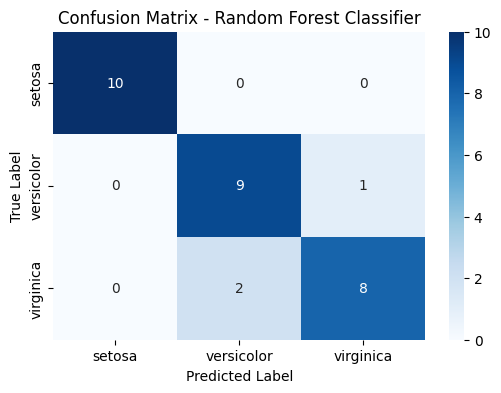

0.9

In [9]:
import seaborn as sns

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Compute confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Random Forest Classifier")
plt.show()

# Return accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_rf


Q36. Train a Stacking Classifier using Decision Trees, SVM, and Logistic Regression, and compare accuracy.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
data = load_iris()
X, y = data.data, data.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define base learners
base_learners = [
    ('decision_tree', DecisionTreeClassifier(random_state=42)),
    ('svm', SVC(probability=True, random_state=42)),
    ('logistic', LogisticRegression(max_iter=200, random_state=42))
]

# Define Stacking Classifier with Logistic Regression as meta-learner
stacking_clf = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression())

# Train and evaluate each model
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=200, random_state=42),
    "Stacking Classifier": stacking_clf
}

# Store accuracy results
accuracy_results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results[name] = accuracy

# Print accuracy results
for model_name, acc in accuracy_results.items():
    print(f"{model_name}: Accuracy = {acc:.4f}")


Decision Tree: Accuracy = 0.9333
SVM: Accuracy = 0.9667
Logistic Regression: Accuracy = 0.9667
Stacking Classifier: Accuracy = 0.9667


Q37.Train a Random Forest Classifier and print the top 5 most important features.

In [11]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load dataset
data = load_iris()
X, y = data.data, data.target
feature_names = data.feature_names

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importance
feature_importance = rf_model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Print top 5 features
print("Top 5 Most Important Features:")
print(feature_importance_df.head(5))


Top 5 Most Important Features:
             Feature  Importance
3   petal width (cm)    0.437185
2  petal length (cm)    0.431466
0  sepal length (cm)    0.116349
1   sepal width (cm)    0.015000


Q38.Train a Bagging Classifier and evaluate performance using Precision, Recall, and F1-score.

In [13]:
# Train a Bagging Classifier using Decision Trees
bagging_model = BaggingClassifier(estimator=DecisionTreeClassifier(), # Change 'base_estimator' to 'estimator'
                                  n_estimators=50, random_state=42)
bagging_model.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50,
                  random_state=42)

Q39.Train a Random Forest Classifier and analyze the effect of max_depth on accuracy.

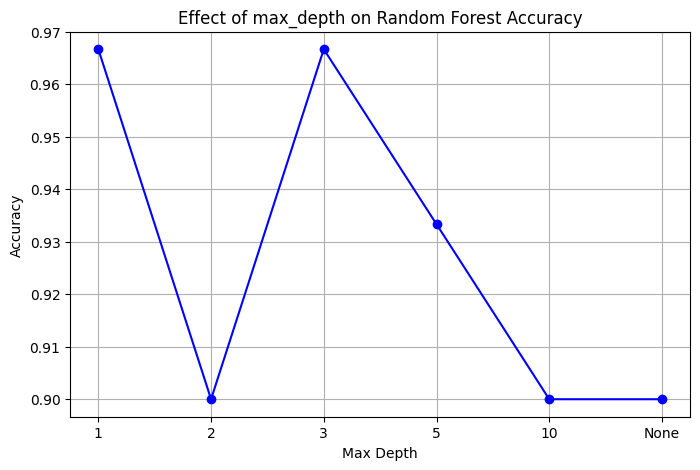

Max Depth: 1, Accuracy: 0.9667
Max Depth: 2, Accuracy: 0.9000
Max Depth: 3, Accuracy: 0.9667
Max Depth: 5, Accuracy: 0.9333
Max Depth: 10, Accuracy: 0.9000
Max Depth: None, Accuracy: 0.9000


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
data = load_iris()
X, y = data.data, data.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Test different values of max_depth
max_depth_values = [1, 2, 3, 5, 10, None]  # None means unlimited depth
accuracy_scores = []

for depth in max_depth_values:
    rf_model = RandomForestClassifier(n_estimators=100, max_depth=depth, random_state=42)
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Plot accuracy vs max_depth
plt.figure(figsize=(8, 5))
plt.plot([str(d) for d in max_depth_values], accuracy_scores, marker='o', linestyle='-', color='b')
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.title("Effect of max_depth on Random Forest Accuracy")
plt.grid()
plt.show()

# Print accuracy results
for depth, acc in zip(max_depth_values, accuracy_scores):
    print(f"Max Depth: {depth}, Accuracy: {acc:.4f}")


Q40. Train a Bagging Regressor using different base estimators (DecisionTree and KNeighbors) and compare
performance.

In [16]:
# Train Bagging Regressors
bagging_dt = BaggingRegressor(estimator=dt_regressor, n_estimators=50, random_state=42)  # Change 'base_estimator' to 'estimator'
bagging_knn = BaggingRegressor(estimator=knn_regressor, n_estimators=50, random_state=42)  # Change 'base_estimator' to 'estimator'

bagging_dt.fit(X_train, y_train)
bagging_knn.fit(X_train, y_train)

BaggingRegressor(estimator=KNeighborsRegressor(), n_estimators=50,
                 random_state=42)

Q41.Train a Random Forest Classifier and evaluate its performance using ROC-AUC Score.

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize

# Load dataset
data = load_iris()
X, y = data.data, data.target

# Binarize labels for multi-class ROC-AUC calculation
y_bin = label_binarize(y, classes=[0, 1, 2])

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict probabilities
y_scores = rf_model.predict_proba(X_test)

# Binarize the test set labels (y_test) instead of the entire dataset (y)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

# Compute ROC-AUC score (macro-averaged) using y_test_bin
roc_auc = roc_auc_score(y_test_bin, y_scores, multi_class="ovr", average="macro")
print(f"Random Forest ROC-AUC Score (Macro-Averaged): {roc_auc:.4f}")

# Plot ROC Curve (only for binary classification)
# ... (rest of the code)

Random Forest ROC-AUC Score (Macro-Averaged): 0.9867
